---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

pd.set_option('display.max_rows', 600)
pd.set_option('max_colwidth', 500)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def blight_model():
    
    # Your code here
#     
    return # Your answer here

### Read in data

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

date_cols = ['ticket_issued_date', 'hearing_date']

train_raw = pd.read_csv('train.csv', encoding = 'cp1252', parse_dates=date_cols+['payment_date'])
test = pd.read_csv('test.csv', parse_dates=date_cols)
address = pd.read_csv('addresses.csv')
latlons = pd.read_csv('latlons.csv')
train_raw.shape
test.shape
address.shape
latlons.shape
train_raw.head()
test.head()

C:\Users\tuttoaposto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(250306, 34)

(61001, 27)

(311307, 2)

(121769, 3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaT,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste collection containers and services,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate on or about the premises,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container between collections,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate on or about the premises,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved containers to remain at curbside - early or late,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


### Check Compliance Proportion in Training Set

In [3]:
groupby_comp=train_raw.groupby([train_raw['compliance'].astype(str), 'disposition', 'compliance_detail', 'payment_status']).size()
groupby_comp=pd.DataFrame(groupby_comp, columns=['n'])
groupby_comp['pct']=groupby_comp['n']/groupby_comp['n'].sum()*100
groupby_comp

groupby_comp.groupby('compliance').agg(n=('n', 'sum'), pct=('pct', 'sum'))

n  \
compliance disposition                        compliance_detail                               payment_status                    
0.0        Responsible by Admission           non-compliant by late payment more than 1 month PAID IN FULL                727   
                                              non-compliant by no payment                     NO PAYMENT APPLIED          207   
                                                                                              PARTIAL PAYMENT APPLIED    8999   
           Responsible by Default             non-compliant by late payment more than 1 month PAID IN FULL              16286   
                                              non-compliant by no payment                     NO PAYMENT APPLIED       116692   
                                                                                              PARTIAL PAYMENT APPLIED      77   
           Responsible by Determination       non-compliant by late payment more than 1 month PAID IN FULL               2003   
                                              non-compliant by no payment                     NO PAYMENT APPLIED         3186   
                                                                                              PARTIAL PAYMENT APPLIED     106   
1.0        Responsible (Fine Waived) by Deter compliant by no fine                            NO PAYMENT APPLIED          184   
                                                                                              PAID IN FULL                 11   
           Responsible by Admission           compliant by early payment                      PAID IN FULL                933   
                                              compliant by late payment within 1 month        PAID IN FULL                449   
                                              compliant by on-time payment                    PAID IN FULL               2353   
                                              compliant by payment on unknown date            PAID IN FULL                  3   
                                              compliant by payment with no scheduled hearing  PAID IN FULL                 30   
           Responsible by Default             compliant by early payment                      PAID IN FULL                 51   
                                              compliant by late payment within 1 month        PAID IN FULL               4810   
                                              compliant by on-time payment                    PAID IN FULL                297   
                                              compliant by payment on unknown date            PAID IN FULL                 59   
                                              compliant by payment with no scheduled hearing  PAID IN FULL                 68   
           Responsible by Determination       compliant by early payment                      PAID IN FULL                  8   
                                              compliant by late payment within 1 month        PAID IN FULL               1041   
                                              compliant by on-time payment                    PAID IN FULL               1230   
                                              compliant by payment on unknown date            PAID IN FULL                  7   
                                              compliant by payment with no scheduled hearing  PAID IN FULL                 63   
nan        Not responsible by City Dismissal  not responsible by disposition                  NO PAYMENT APPLIED        33874   
                                                                                              PAID IN FULL                527   
           Not responsible by Determination   not responsible by disposition                  NO PAYMENT APPLIED         6555   
                                                                                              PAID IN FULL                 84

,n,pct
compliance,,
0.0,148283,59.240689
1.0,11597,4.633129
nan,90426,36.126182


In [5]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(train_raw
#                        , title='Pandas Profiling Report'
#                        , progress_bar = False
# #                        , minimal=True
#                     )
# profile.to_file(output_file="train_profile_report.html")

# profile = ProfileReport(test
#                        , title='Pandas Profiling Report'
#                        , progress_bar = False
# #                        , minimal=True
#                     )
# profile.to_file(output_file="test_profile_report.html")

### Correlation between Fine and Judgment Amounts

<IPython.core.display.Javascript object>


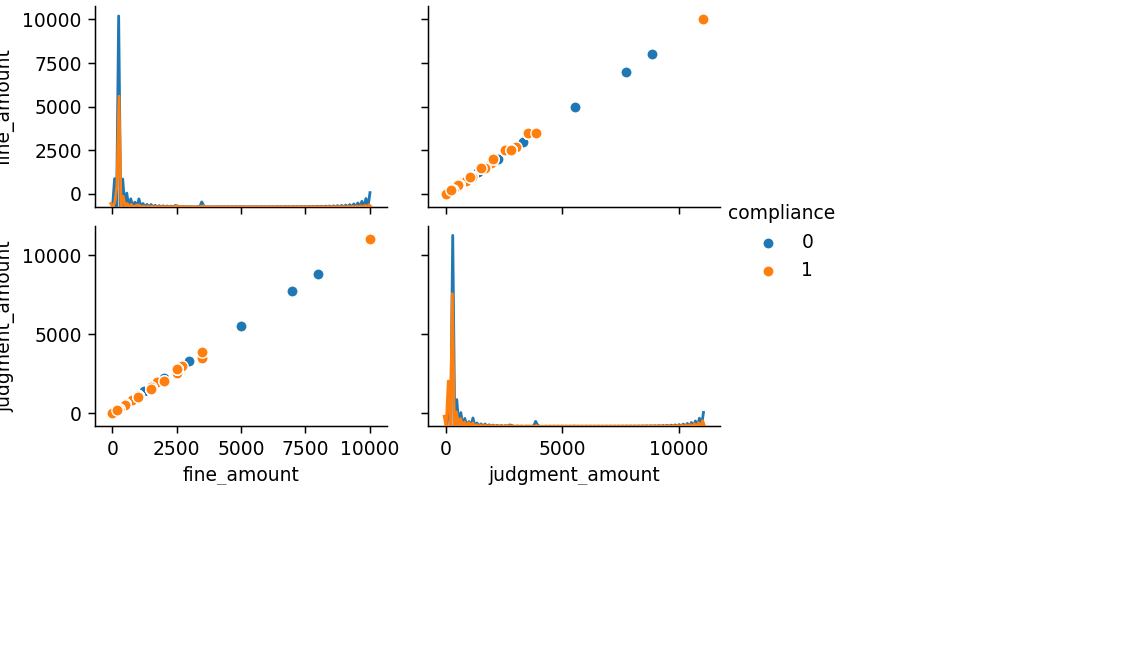

In [471]:
import seaborn as sns
cols = ['fine_amount',
        # 'admin_fee',
        # 'state_fee',
        # 'late_fee',
        # 'discount_amount',
         'judgment_amount','compliance']

sns.pairplot(train[cols], hue='compliance', diag_kind='kde', height=1.8, aspect=1.5);

### How Does Compliance Change with Ticket Issued Date?

In [16]:
#Remove missing compliance
train_ = train_raw[train_raw['compliance'].isna()==False]
# train.shape
# train.groupby('compliance').size()

<IPython.core.display.Javascript object>


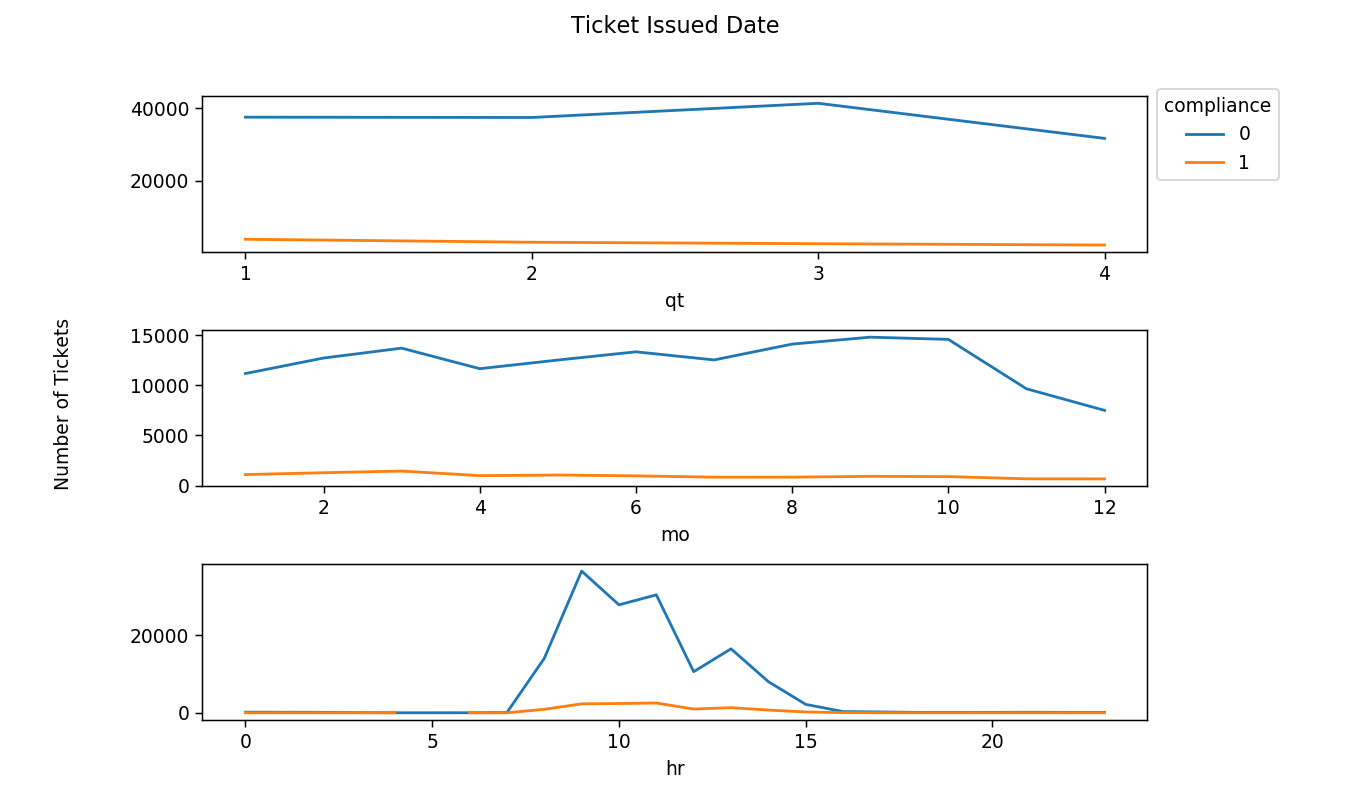

<IPython.core.display.Javascript object>


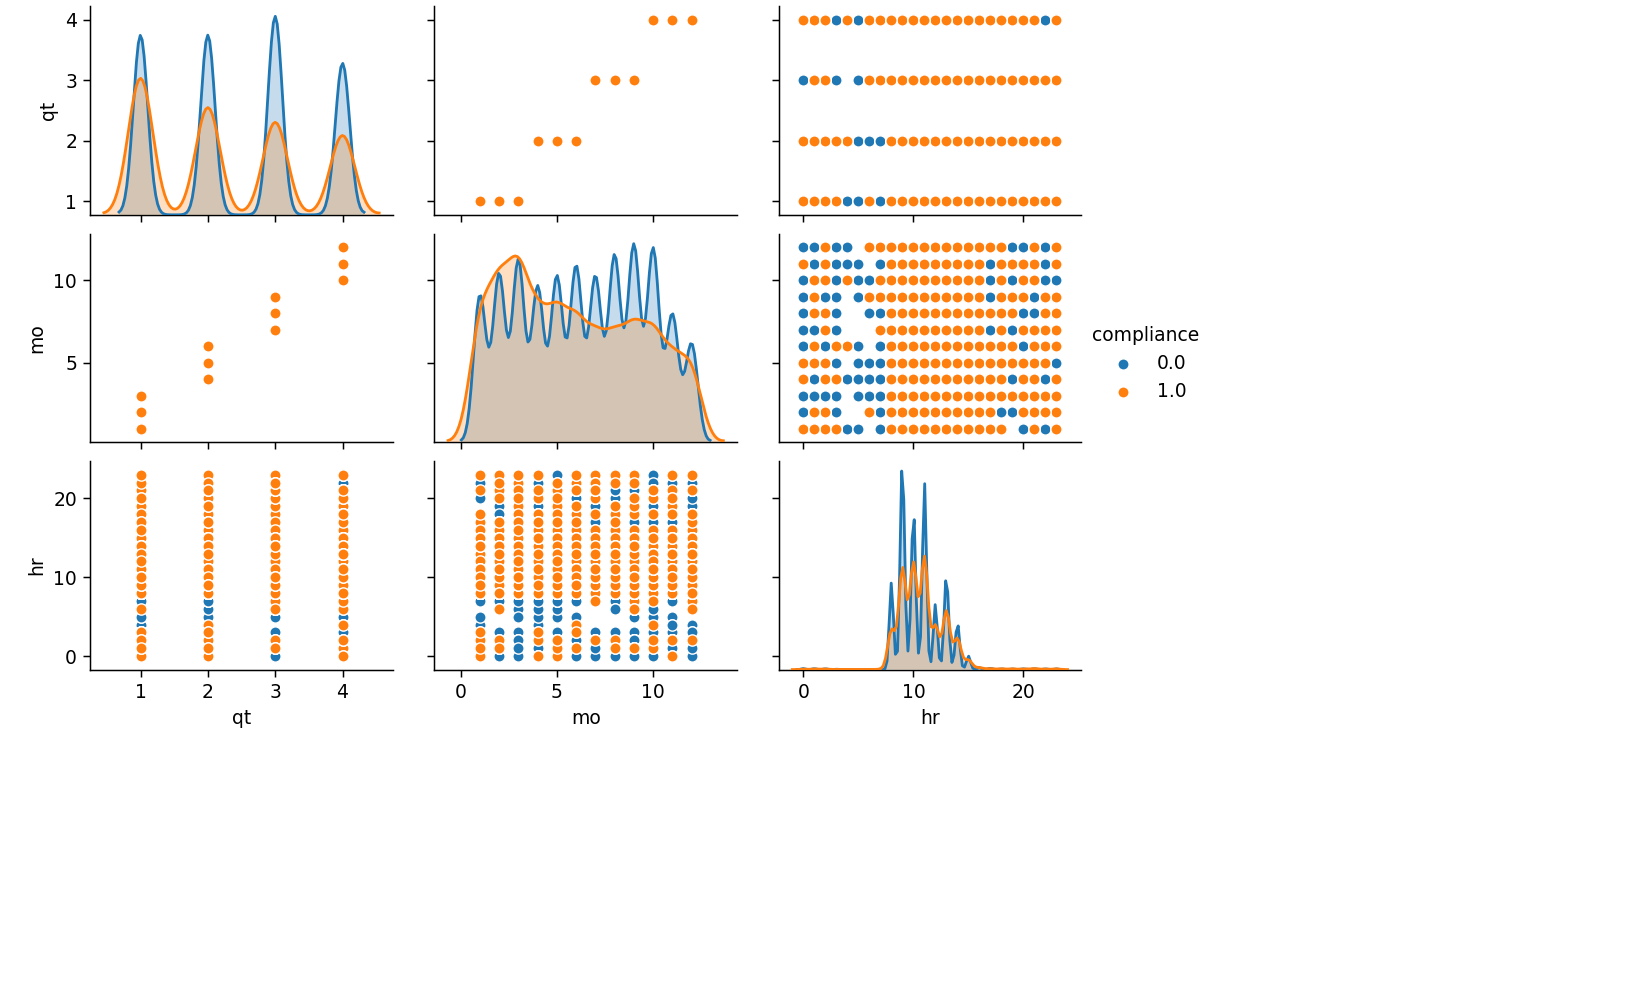

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
# from datetime import date
%matplotlib notebook
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(10,6))
a = train_.loc[train_['ticket_issued_date'].dt.year>=2004, ['ticket_id', 'compliance', 'ticket_issued_date']]
a['dt'] = a['ticket_issued_date'].dt.date
a['qt'] = a['ticket_issued_date'].dt.quarter
a['mo'] = a['ticket_issued_date'].dt.month
a['hr'] = a['ticket_issued_date'].dt.hour

# a.head()
a.groupby(['qt', 'compliance'])['ticket_id'].count().unstack().plot(ax=ax1, kind='line', legend=False, xticks=[1,2,3,4])
a.groupby(['mo', 'compliance'])['ticket_id'].count().unstack().plot(ax=ax2, kind='line', legend=False)
a.groupby(['hr', 'compliance'])['ticket_id'].count().unstack().plot(ax=ax3, kind='line', legend=False)
plt.subplots_adjust(left=0.15, right=0.85, hspace=0.5)
fig.text(0.04, 0.5, 'Number of Tickets', va='center', rotation='vertical')
fig.legend(labels = [0, 1], title = 'compliance', bbox_to_anchor=(0.85, 0.9), loc='upper left', ncol=1)
fig.suptitle('Ticket Issued Date');

#Correlation
sns.pairplot(a[['qt','mo','hr', 'compliance']], hue='compliance', diag_kind='kde', height=1.8, aspect=1.5);

### How to Use Ticket Issued and Hearing Dates? How about Number of Days Between Dates?

In [21]:
a = train_[['compliance', 'ticket_issued_date', 'hearing_date']].copy()
a['days'] = abs((a['hearing_date'] - a['ticket_issued_date'])).map(lambda x: x.days)
a.head()
b=a.groupby('compliance').describe().stack().unstack(level=0)
b
a[a['days']<0]

,compliance,ticket_issued_date,hearing_date,days
0,0.0,2004-03-16 11:40:00,2005-03-21 10:30:00,369.0
1,1.0,2004-04-23 12:30:00,2005-05-06 13:30:00,378.0
5,0.0,2004-05-01 11:50:00,2005-03-21 10:30:00,323.0
6,0.0,2004-06-14 14:15:00,2005-02-22 15:00:00,253.0
7,0.0,2004-06-16 12:30:00,2005-02-22 15:00:00,251.0


days              
compliance            0.0           1.0
count       148222.000000  11431.000000
mean            72.852667     71.810253
std             59.100407     96.382613
min              0.000000      0.000000
25%             31.000000     28.000000
50%             54.000000     48.000000
75%            100.000000     95.000000
max           4325.000000   7933.000000

,compliance,ticket_issued_date,hearing_date,days


<IPython.core.display.Javascript object>


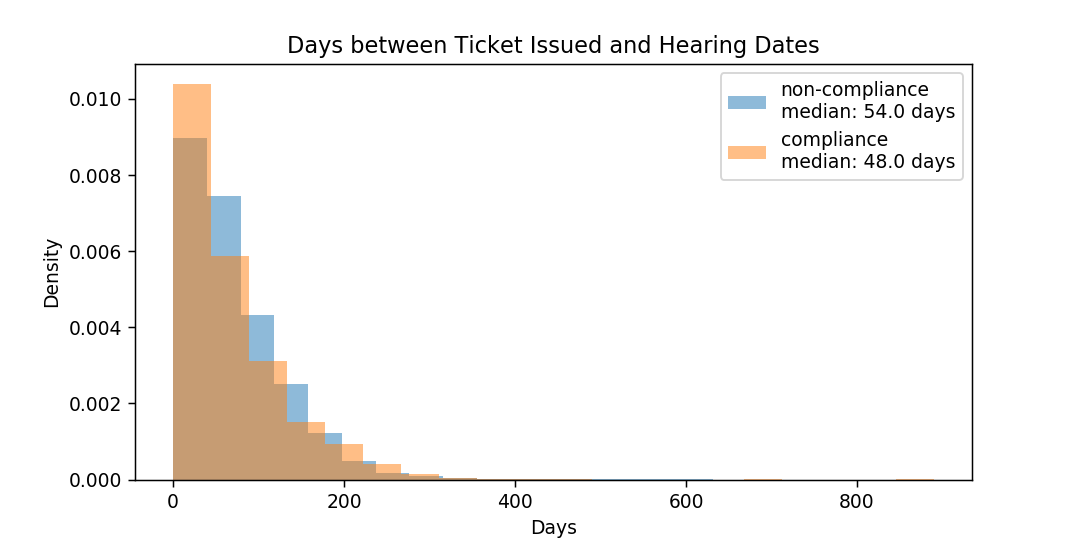

In [22]:
plt.figure(figsize=(8,4))
plt.hist(a.loc[(a['compliance']==0) & (a['days']>=0) & (a['days']<1000), 'days'], density=True, bins=20, alpha=0.5,
         color='tab:blue', label = 'non-compliance\nmedian: {} days'.format(b['days', 0.0]['50%']))
plt.hist(a.loc[(a['compliance']==1) & (a['days']>=0) & (a['days']<1000), 'days'], density=True, bins=20, alpha=0.5,
         color='tab:orange', label='compliance\nmedian: {} days'.format(b['days', 1.0]['50%']))
plt.xlabel('Days')
plt.ylabel('Density')
plt.title('Days between Ticket Issued and Hearing Dates')
plt.legend();

### Gather Geocode and Extract Useful Info from Raw Data
Will derive columns the same way for both training and test sets using a function

In [3]:
import pandas as pd
import numpy as np
date_cols = ['ticket_issued_date', 'hearing_date']
address = pd.read_csv('addresses.csv')
latlons = pd.read_csv('latlons.csv')

def extract(df, nm):
    
    # ---- Get geocode
    df = df.merge(right=address, how='left', on='ticket_id')\
           .merge(right=latlons, how='left', on='address')
    l = len(df[(df['lat'].isna())|(df['lon'].isna())])
    print('Missing {} geocode in {} set'.format(l, nm))
    
    
    # ---- Extract useful info from raw data
    
    # 1. Violator = acorn vs bank vs LLC
    df['violator_grp'] = np.where(df['violator_name'].str.contains('bank(,|\s)|bank$', case=False)==True, 'Bank',
                            np.where(df['violator_name'].str.contains('LLC(,|\s)|LLC$', case=False)==True, 'LLC',
                              np.where(df['violator_name'].str.contains('acorn(,|\s)|acorn$', case=False)==True, 'Acorn', 'Other'
#                              np.where(df['violator_name'].isna()==False, 'Other', np.nan
                                     )))
    
    df['violatorAcorn']=df['violator_grp'].map(lambda x: 'Y' if x=='Acorn' else 'N')
    
    #violator group + location
    df['violator_grp_loc'] = df['violator_grp'] +  df['city'].astype(str).str.upper() + df['zip_code'].astype(str)

    list_of_violator = sorted(df['violator_grp_loc'].unique())
    k  = pd.DataFrame({'violator_grp_loc': list_of_violator,
                        'violator_grp_id' : range(len(list_of_violator))})


    df = df.merge(right=k, how='left', on='violator_grp_loc')

    df['violatorAcorn']=df['violator_grp'].map(lambda x: 'Y' if x=='Acorn' else 'N')

    # 2. Standardize varities of 'PO Box'
    df['POBOX']=np.where(df['mailing_address_str_name'].str.contains('P(\s|\.)*O(\s|\.)*BOX', case=False) ==True, 1, 0)
   

    # 3. Standardize mailing address city names
    df['city']=df['city'].str.upper()
    df.loc[ (df['city'].str.contains('\ADET(\s|\.|\,)?')==True) & 
            (df['city'].str.contains('DETOUR')==False), 'city']='DETROIT'
    df.loc[df['city']=='W. BLOOMFIELD', 'city']='WEST BLOOMFIELD'
    
    top5city = ['DETROIT', 'SOUTHFIELD', 'DEARBORN', 'WEST BLOOMFIELD', 'FARMINGTON HILLS']

    df['city_cat'] = df['city'].map(lambda x: x if x in top5city else 'Other')
    df['city_cat'].replace(to_replace='\s', value='_', regex=True, inplace=True)    
 

    # 4. violation_description = solid waste, etc
    # a=test[['violation_description', 'violation_code']]
    # b=a.groupby(['violation_code','violation_description']).size().sort_values(ascending=False)
    # b = pd.DataFrame(b, columns=['n'])
    # b.reset_index(inplace=True)
    # b.sort_values('violation_code')
#     df['violation_type']= \
#         list(map(lambda x: 'Solid_Waste' if x[:3] == '22-' \
#                                          else('Prop_Maint' if (x[:2] =='9-') or (re.search('\d{4}(0901)\Z',x)!=None)\
#                                                            else('Zoning' if x[:3] == '61-' \
#                                                                          else None)), df['violation_code']))
    df['violation_type']= np.where(df['violation_code'].str.contains('\A22-', regex=True)==True, 'Solid_Waste',
                           np.where((df['grafitti_status']=='GRAFFITI TICKET') | 
                                 (df['violation_description'].str.contains('graffiti', case=False)==True), 'Graffiti',
                            np.where(df['violation_code'].str.contains('((\A9-)|(\d{4}(0901)\Z))', regex=True)==True, 'Prop_Maint',
                             np.where(df['violation_code'].str.contains('\A61-', regex=True)==True, 'Zoning', 'Other'))))      

    
    df['violation_c'] = df['violation_code'].map(lambda x: 9 if re.match('(\d{4}(0901)\Z)',x)
                                                         else int((re.match('\A\d+(?=\-)',x).group(0))
                                                               if re.match('\A\d+(?=\-)',x) else np.nan))
    
    df.loc[df['violation_type'] == 'Graffiti', 'violation_c'] = 99
#     print(df.groupby(['violation_c', 'violation_type']).size())
    
    #5. Extract quarters, months, hours from Ticket Issue Date
    df['qt'] = df['ticket_issued_date'].dt.quarter
    df['qt_num'] = df['qt']
    df['mo'] = df['ticket_issued_date'].dt.month
    df['mo_hearing'] = df['hearing_date'].dt.month
    df['hr'] = df['ticket_issued_date'].dt.hour
    df['hr_hearing'] = df['hearing_date'].dt.hour
    df['hr10am'] = df['hr'].map(lambda x: 'Y' if x>=10 else 'N')
    df['hr10am_hearing'] = df['hr_hearing'].map(lambda x: 'Y' if x>=10 else 'N')
    
    df['dow_hearing'] = df['hearing_date'].dt.dayofweek

    #6. Days between ticket issued and hearing dates - assume dates switched if number of days is negative
    df.loc[df['hearing_date'].notnull(), 'issued_hearing_days'] = abs((df['hearing_date'] - df['ticket_issued_date'])).map(lambda x: x.days)

    #7 Abbreviate agency names
    df['agency']= df['agency_name'].map({'Buildings, Safety Engineering & Env Department': 'Env',
                                    'Department of Public Works' : 'Public',
                                    'Detroit Police Department': 'Police',
                                    'Health Department': 'Other',
                                    'Neighborhood City Halls': 'Other'})
    #8. Convert geocode to XYZ coordinates
       #https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
    #Convert lat, lon from degrees to radians
    df[['lat_rad', 'lon_rad']]=df[['lat', 'lon']].apply(np.radians)
    
    df['loc_x'] = np.cos(df['lat_rad']) * np.cos(df['lon_rad'])
    df['loc_y'] = np.cos(df['lat_rad']) * np.sin(df['lon_rad'])
    df['loc_z'] = np.sin(df['lat_rad']) 

   
    #9. Flag state fee, admin fee, discount_amount
#     df['state_fee_YN'] = df['state_fee'].map(lambda x: 'Y' if x>0 else 'N') #Comment out as known compliant status always have a fee
#     df['admin_fee_YN'] = df['admin_fee'].map(lambda x: 'Y' if x>0 else 'N')
    df['discount_YN']=df['discount_amount'].map(lambda x: 'Y' if x>0 else 'N')
    
    #10. See if judgment amount > total fee responsible (late fee applied -> not compliant) or 
        #       judgment amount <= total fee responsible (no late fee applied -> compliant)
    df['fee'] = df['fine_amount']+df['admin_fee']+df['state_fee']+df['clean_up_cost']
    df['diff'] = df['judgment_amount'] - df['fee']
    df['responsible'] = df['diff'].map(lambda x: 1 if x<=0 else 0)
    
    #11. Keep just columns needed
    cols_to_keep = ['ticket_id', 'fine_amount', 'late_fee', 'discount_amount', 'judgment_amount',  
                    'issued_hearing_days', 
                    'loc_x', 'loc_y', 'loc_z',
                    'lat', 'lon',
                    'mailing_address_str_number',
                    'discount_YN', 'diff', 'responsible',
                     'POBOX',
                    'agency', 'violator_grp', 'violatorAcorn', 'violator_grp_id', 'city_cat',
                    'violation_type', 'violation_c',
                    'qt', 'qt_num', 'hr', 'mo', #hr10am hr10am_hearing
                    'hr_hearing',  'mo_hearing', 'dow_hearing'
                    ]
    # Add target column to training set
    if nm=='train':
        cols_to_keep += ['compliance']
        
    def keepcols(_df):
        _df = _df[cols_to_keep]
        return _df
    
    df = keepcols(df)  #<----- comment out if testing for extraction results in the next cell
    return df


train_raw = pd.read_csv('train.csv', encoding = 'cp1252', parse_dates=date_cols+['payment_date'])
test = pd.read_csv('test.csv', parse_dates=date_cols)

#Remove missing compliance
train = train_raw[train_raw['compliance'].isna()==False]

#Convert compliance to integer values
train['compliance'] = train['compliance'].astype(int)
#a = extract(train, 'train')  # For testing extraction results in next cell
train = extract(train, 'train')

#a = extract(test, 'test') # For testing extraction results in next cell
test = extract(test, 'test')


C:\Users\tuttoaposto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\tuttoaposto\anaconda3\lib\site-packages\ipykernel_launcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Missing 2 geocode in train set


C:\Users\tuttoaposto\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Missing 5 geocode in test set


In [ ]:
# Check after joining geocode
cols = ['violation_street_number' ,'violation_street_name' ,'violation_zip_code', 'address', 'lat', 'lon']
a[cols].tail()

# Check missing lat,lon
a[(a['address'].isna()==False) & (a['lat'].isna())][cols]

# Check violator groups
a.groupby('violator_grp').size()
a.groupby('violator_grp').size().sum()
len(a)

b = a[['violator_grp', 'violator_name']].drop_duplicates().sort_values(by=['violator_grp', 'violator_name'])
b.groupby('violator_grp').head()
b.groupby('violator_grp').tail()

# Check PO Box
a.groupby('POBOX').size()
a[a['mailing_address_str_name'].str.contains('BOX', case=False)==True].groupby(['POBOX', 'mailing_address_str_name'])\
    .size().sort_values(ascending=False)
    
# Check violation type
a.groupby('violation_type').size()
b = a.groupby(['violation_type', 'violation_code','violation_description']).size().sort_values(ascending=False)
b = pd.DataFrame(b, columns=['n'])
b.reset_index(inplace=True)
b.sort_values(['violation_type', 'violation_code', 'violation_description']).groupby('violation_type').head()
b.sort_values(['violation_type', 'violation_code', 'violation_description']).groupby('violation_type').tail()
b.sort_values('n', ascending=False).head(10)

#Check mailing city
a.groupby(['city_cat','city']).size().sort_values(ascending=False).head(20)

### Create Dummy Variables

In [61]:
dummylist = ['POBOX', 'discount_YN', 'agency', 'violator_grp', 'violatorAcorn', 'violation_type', 'city_cat', 'qt']
prefix = list(map(lambda x: re.search('[^_]*',x).group(), dummylist))

cont_varlist = ['ticket_id', 'fine_amount', 'late_fee', 'discount_amount', 'judgment_amount', 
                'diff', 'responsible',
                'issued_hearing_days',
                'lat', 'lon',
                'loc_x', 'loc_y', 'loc_z',
                'mailing_address_str_number',
                'violator_grp_id',
                'violation_c',
                'qt_num', 'hr', 'mo',
                'hr_hearing', 'mo_hearing', 'dow_hearing'
                ]

for x in dummylist:
    cat = np.union1d(train[x], test[x])
    train[x] = train[x].astype(pd.CategoricalDtype(categories=cat))
    test[x] = test[x].astype(pd.CategoricalDtype(categories=cat))
    
train_ = pd.get_dummies(train.iloc[:, :-1], columns=dummylist, prefix=prefix) #Pop compliance column to be put back as the last column
test = pd.get_dummies(test, columns=dummylist, prefix=prefix)

train = pd.concat([train_, train[['compliance']]], axis=1)

train.shape; test.shape
test.iloc[:, :15].head()
test.iloc[:, 15:25].head()
test.iloc[:, 25:].head()

(159880, 51)

(61001, 50)

,ticket_id,fine_amount,late_fee,discount_amount,judgment_amount,issued_hearing_days,loc_x,loc_y,loc_z,lat,lon,mailing_address_str_number,diff,responsible,violator_grp_id
0,284932,200.0,20.0,0.0,250.0,14.0,0.090155,-0.732841,0.674400,42.407581,-82.986642,141,20.0,0,3054
1,285362,1000.0,100.0,0.0,1130.0,31.0,0.086910,-0.733012,0.674640,42.426239,-83.238259,19136,100.0,0,3069
2,285361,100.0,10.0,0.0,140.0,31.0,0.086910,-0.733012,0.674640,42.426239,-83.238259,19136,10.0,0,3069
3,285338,200.0,20.0,0.0,250.0,32.0,0.088556,-0.734196,0.673137,42.309661,-83.122426,2246,20.0,0,5855
4,285346,100.0,10.0,0.0,140.0,39.0,0.088574,-0.734204,0.673126,42.308830,-83.121116,3435,10.0,0,4108


,violation_c,qt_num,hr,mo,hr_hearing,mo_hearing,dow_hearing,POBOX_0,POBOX_1,discount_N
0,22,1,14,1,9.0,1.0,3.0,1,0,1
1,22,1,9,1,9.0,2.0,0.0,1,0,1
2,22,1,9,1,9.0,2.0,0.0,1,0,1
3,22,1,10,1,9.0,2.0,1.0,1,0,1
4,22,1,10,1,9.0,2.0,1.0,1,0,1


,discount_Y,agency_Env,agency_Other,agency_Police,agency_Public,violator_Acorn,violator_Bank,violator_LLC,violator_Other,violatorAcorn_N,...,city_DEARBORN,city_DETROIT,city_FARMINGTON_HILLS,city_Other,city_SOUTHFIELD,city_WEST_BLOOMFIELD,qt_1,qt_2,qt_3,qt_4
0,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


### Distribution of Variables by Compliance

In [62]:
cat_varlist =list(filter(lambda x: re.search('POBOX|agency|violator(?!_grp_id)|violation(?!_c{1})|city|qt_\d{1}|discount_(Y|N)', x), train.columns))
groupby = train.groupby('compliance')
groupby[cat_varlist].agg('mean').T.applymap(lambda x: '{:.2f}%'.format(x*100))

groupby[cont_varlist].describe().T.applymap(lambda x: '{:.4f}'.format(x))

compliance,0,1
POBOX_0,90.25%,94.90%
POBOX_1,9.75%,5.10%
discount_N,99.96%,90.32%
discount_Y,0.04%,9.68%
agency_Env,60.72%,50.21%
agency_Other,4.48%,4.04%
agency_Police,2.61%,5.07%
agency_Public,32.19%,40.68%
violator_Acorn,1.09%,0.00%
violator_Bank,2.72%,1.78%


compliance                                   0            1
ticket_id                  count   148283.0000   11597.0000
                           mean    151021.0674  143201.3460
                           std      77016.5982   79484.5465
                           min      18645.0000   18653.0000
                           25%      83796.5000   76465.0000
                           50%     150559.0000  130855.0000
                           75%     217959.0000  210894.0000
                           max     292405.0000  299363.0000
fine_amount                count   148283.0000   11597.0000
                           mean       366.3193     238.3272
                           std        693.5701     357.3437
                           min         25.0000       0.0000
                           25%        200.0000     100.0000
                           50%        250.0000     250.0000
                           75%        250.0000     250.0000
                           max      10000.0000   10000.0000
late_fee                   count   148283.0000   11597.0000
                           mean        35.2617      13.0634
                           std         69.4989      30.9424
                           min          0.0000       0.0000
                           25%         10.0000       0.0000
                           50%         25.0000       5.0000
                           75%         25.0000      25.0000
                           max       1000.0000    1000.0000
discount_amount            count   148283.0000   11597.0000
                           mean         0.0087       2.5903
                           std          0.7705      15.4923
                           min          0.0000       0.0000
                           25%          0.0000       0.0000
                           50%          0.0000       0.0000
                           75%          0.0000       0.0000
                           max        250.0000     350.0000
judgment_amount            count   148283.0000   11597.0000
                           mean       431.5810     280.8862
                           std        762.5648     381.1236
                           min         55.0000       0.0000
                           25%        250.0000     130.0000
                           50%        305.0000     280.0000
                           75%        305.0000     305.0000
                           max      11030.0000   11030.0000
diff                       count   148283.0000   11597.0000
                           mean        35.2617      12.5590
                           std         69.4989      31.3926
                           min          0.0000     -30.0000
                           25%         10.0000       0.0000
                           50%         25.0000       5.0000
                           75%         25.0000      25.0000
                           max       1000.0000    1000.0000
responsible                count   148283.0000   11597.0000
                           mean         0.0665       0.4831
                           std          0.2491       0.4997
                           min          0.0000       0.0000
                           25%          0.0000       0.0000
                           50%          0.0000       0.0000
                           75%          0.0000       1.0000
                           max          1.0000       1.0000
issued_hearing_days        count   148222.0000   11431.0000
                           mean        72.8527      71.8103
                           std         59.1004      96.3826
                           min          0.0000       0.0000
                           25%         31.0000      28.0000
                           50%         54.0000      48.0000
                           75%        100.0000      95.0000
                           max       4325.0000    7933.0000
lat                        count   148281.0000   11597.0000
                           mean        4

## <font color=red> Warning!! Probably just keep all dummy encoding as regularized algorithms can handle sigularity</font>
### Delete the Biggest Category from Each Dummy Group

In [6]:
# big_dummy =['agency_CityHall', 'violator_Acorn', 'violation_Graffiti', 'city_FARMINGTON_HILLS', 'qt_4']
# train.drop(big_dummy, axis=1, inplace = True)
# test.drop(big_dummy, axis=1, inplace = True)
# train.shape; test.shape

(159880, 28)

(61001, 27)

### Violation Locations per Compliance Status

<IPython.core.display.Javascript object>


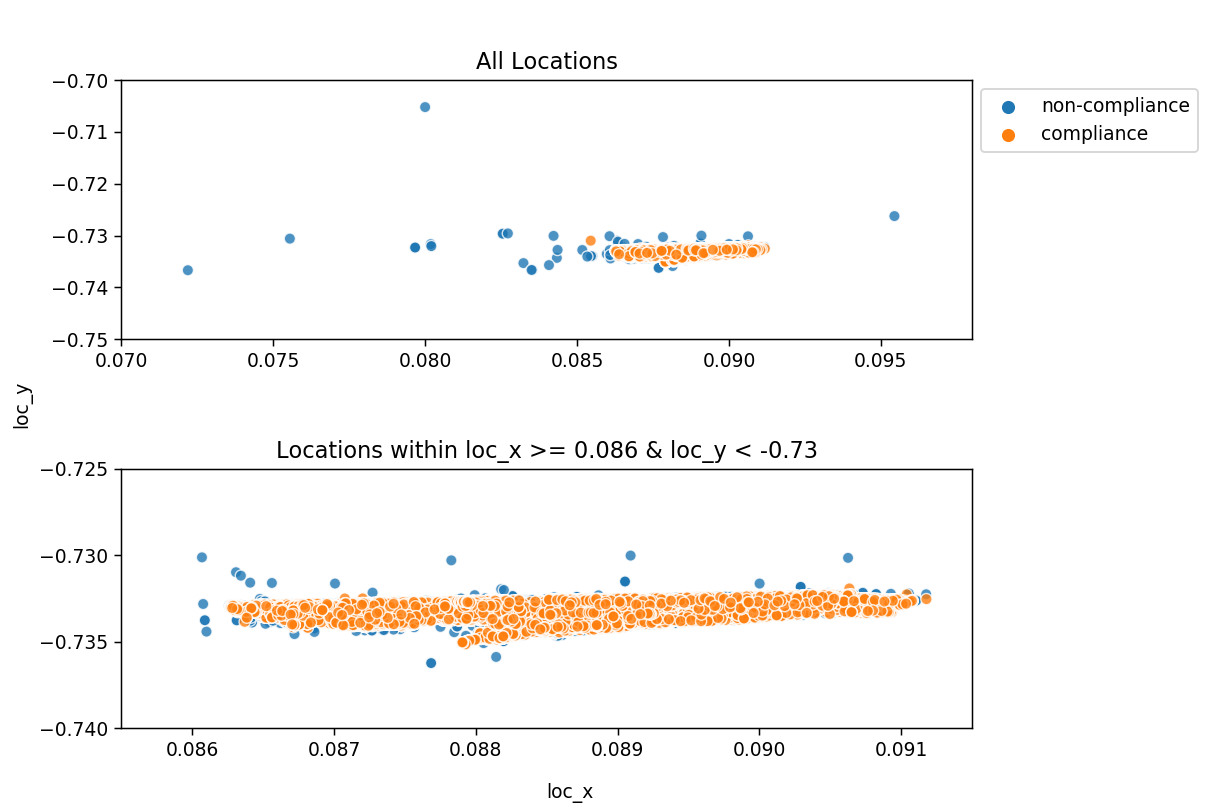

In [115]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

# Move compliance data points to the bottom so that compliance will be plotted over non-compliance in scatterplot
k = train[train['compliance']==0].append(train[train['compliance']==1])
k1 = k[(k['loc_x']>=0.086) & (k['loc_y']<-0.73)]


fig, [ax1, ax2] = plt.subplots(2,1, figsize=(9,6))

sns.scatterplot(x='loc_x', y='loc_y', data=k, hue='compliance', alpha=0.8, ax=ax1)
ax1.set_title('All Locations')
ax1.set(xlim=[0.07, 0.098], ylim=[-0.75, -0.70], xlabel=None, ylabel=None)

sns.scatterplot(x='loc_x', y='loc_y', data=k1, hue='compliance', alpha=0.8, ax=ax2)
ax2.set_title('Locations within loc_x >= {} & loc_y < {}'.format(0.086, -0.73))
ax2.set(xlim=[0.0855, 0.0915], ylim=[-0.74, -0.725], xlabel=None, ylabel=None)

#Borrow legend from ax2 and draw it outside of subplots
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles=(handles[1:]), labels=('non-compliance', 'compliance'), title = None, bbox_to_anchor=(0.8, 0.9), loc='upper left', ncol=1)
#Now remove the subplot legend
ax1.get_legend().remove()
ax2.get_legend().remove()

fig.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1, hspace=0.5)

#Get ax2 location to position figure x axis label
left, bottom, width, height = ax2.get_position().bounds
x_pos = left+width/2
fig.text(x_pos, 0.02, 'loc_x', va='center')
fig.text(0.01, 0.5, 'loc_y', va='center', rotation='vertical');

## <font color=red>Warning!!</font>
The following tranform steps (imputer, scaler, train-test split) are done outside of GridSearchCV and LogisticRegressionCV
estimator steps, which can result in leaking test data into model fitting.
A proper way of tranforming data should be done within the CV fold, which can be achieved using sklearn.pipeline.Pipeline.

The pipeline process shown after the GridSearchCV and LogisticRegressionCV examples uses the entire train set as the input for cross-validation and therefore no explicit train-test split is needed.

In [9]:
#Include just columns needed
cols = [
#         'fine_amount'
#         , 'issued_hearing_days'
#         , 'loc_x', 'loc_y', 'loc_z'
#         , 'POBOX_0', 'POBOX_1'
#         , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#         , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
        , 'violatorAcorn_N', 'violatorAcorn_Y'
#         , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#         , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'
#         , 'qt_1', 'qt_2', 'qt_3','qt_4'
#         , 'discount_N', 'discount_Y'
    ]


X = train.loc[:, cols]
y = train.iloc[:, -1]

# X_test = test.loc[:, cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()
X_train.shape

#X_train.reset_index(inplace=True, drop=True)
# X_train['loc_z'].median()
# X_train[cont_varlist][X_train['loc_z'].isna()==True].head()
# X_train[cont_varlist][X_train['issued_hearing_days'].isna()==True].head()

#Check columns with missing values
#print('Training set:\n\n{}\n\n'.format(np.sum(np.isnan(X_train))))
# print('Test set:\n\n{}\n\n'.format(np.sum(np.isnan(X_test))))

# For continous variables
# Fill in nan with median values
# bc only issued_hearing_days and loc_xyz have missing values and their distributions are skewed
Imp = SimpleImputer(strategy = 'median') 
X_train = Imp.fit_transform(X_train)
X_test = Imp.transform(X_test)


# Check columns with missing values again
# print('Training set:\n\n{}\n\n'.format(np.sum(np.isnan(X_train))))
# print('Test set:\n\n{}\n\n'.format(np.sum(np.isnan(X_test))))

# Scale continuous variables
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape; X_test.shape
# Check scaled values for first 5 rows
# for i in np.arange(1,6):
#     pd.concat([pd.DataFrame(X_train[i-1:i], columns=X.columns),
#                pd.DataFrame(X_train_scaled[i-1:i], columns=X.columns)]).set_index(pd.Index([i-1]*2)).iloc[:, :10]
    
#     pd.concat([pd.DataFrame(X_train[i-1:i], columns=X.columns, index=[i-1]),
#                pd.DataFrame(X_train_scaled[i-1:i], columns=X.columns)]).set_index(pd.Index([i-1]*2)).iloc[:, 10:]

,fine_amount,loc_x,loc_y,loc_z,discount_YN,POBOX,violator_Bank,violator_LLC,violator_Other
67578,250.0,0.088558,-0.733380,0.674027,0,0,0,0,1
123761,250.0,0.089557,-0.733340,0.673938,0,0,0,0,1
89311,100.0,0.088621,-0.733453,0.673938,0,0,0,0,1
45141,50.0,0.088813,-0.734149,0.673155,0,0,0,0,1
57759,250.0,0.090585,-0.732920,0.674257,0,1,0,0,1


(119910, 9)

(119910, 9)

(39970, 9)

### Use GridSearchCV to Find the Best C Parameter Value

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

,param_C,param_C_log10
mean_test_score,,
0.673171,100.0000,2.0
0.673162,1000.0000,3.0
0.673056,10.0000,1.0
0.669382,1.0000,0.0
0.659734,0.1000,-1.0
0.646547,0.0100,-2.0
0.635870,0.0010,-3.0
0.609229,0.0001,-4.0


<IPython.core.display.Javascript object>


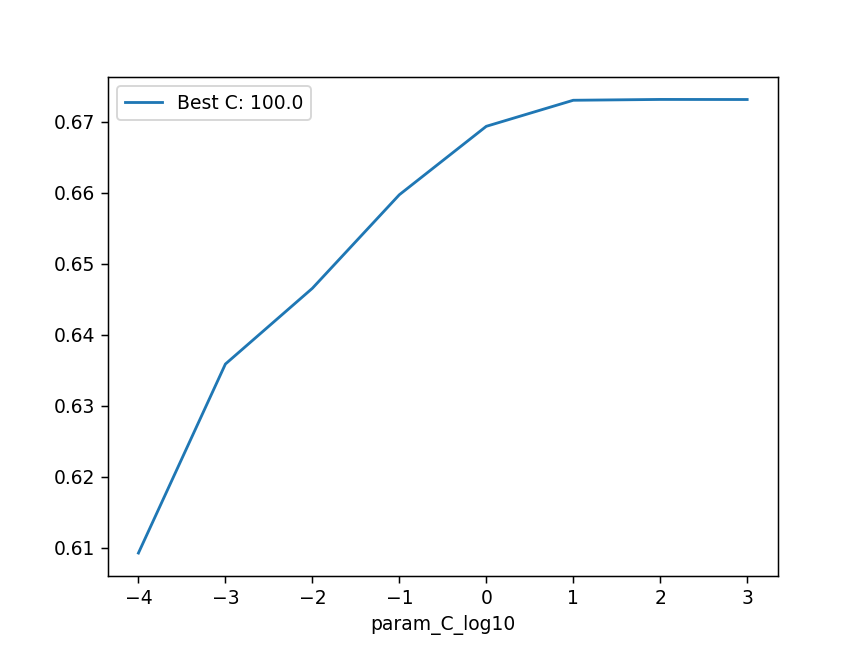

For C = 100.0:



array([[37063,    15],
       [ 2633,   259]], dtype=int64)

Score: 0.6682128398978282
Area under ROC: 0.6682128398978282




<IPython.core.display.Javascript object>


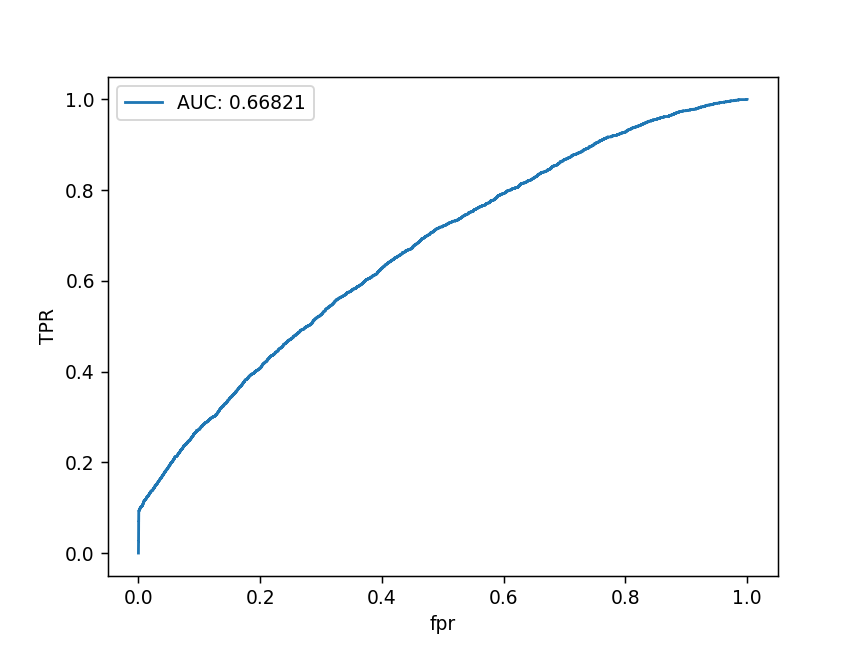

Text(0, 0.5, 'TPR')

In [153]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc

# 1. Use Grid Search to find parameter C value:

# Tried the following C ranges:
# np.logspace(-4, 2, 8) #Getting bath tub shape with bottom at C = 10, then plateau at C=1000
# np.linspace(10,1000,100, dtype=int) # Highest test score at C = 90, then plateau after
# np.linspace(85, 109, 25) # Final round: C = 94 is the max score

grid_values = {'C': np.logspace(-4, 3, 8)}
lr = LogisticRegression()
lr = LogisticRegression(random_state=0, max_iter=1000, solver='saga', penalty='l2', class_weight='balanced')

# default metric to optimize over grid parameters: Precision
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring='roc_auc', cv=3)
grid_lr.fit(X_train_scaled, y_train)

results = grid_lr.cv_results_
#     list(zip(results['mean_test_score'], results['params']))
# pd.DataFrame(list(zip(results['mean_test_score'], results['params'])))

# Plot mean test score per C parameter values
k = pd.DataFrame(results)
k['param_C_log10'] = np.log10(k['param_C'].astype('float64'))

## Tabulate C paramter and mean test score
k[['param_C', 'mean_test_score', 'rank_test_score', 'param_C_log10']]\
.groupby('mean_test_score').agg({'param_C':'min', 'param_C_log10':'min'})\
.sort_index(ascending=False)

## Plot mean test score
%matplotlib notebook
k[['param_C', 'mean_test_score', 'rank_test_score', 'param_C_log10']]\
.plot.line(x = 'param_C_log10', y = 'mean_test_score',label='Best C: {}'.format(grid_lr.best_params_['C']))
# plt.ylabel('mean test score')

# k[['param_C', 'mean_test_score', 'rank_test_score', 'param_C_log10']]\
# .groupby('mean_test_score').agg({'param_C':'min', 'param_C_log10':'min'})\
# .sort_values('param_C')\
# .reset_index()\
# .plot.line(x = 'param_C', y = 'mean_test_score',label='Best C: {}'.format(grid_lr.best_params_['C']))
# plt.ylabel('mean test score')


# 2. Now predict using grid search logistic regressor

##Get confusion matrix and accuracy score
y_pred = grid_lr.predict(X_test_scaled)
score = grid_lr.score(X_test_scaled, y_test) #based on scoring method

#     y_proba_list = list(zip(y_test[0:20], prob[0:20,1]))
 
# k = prob[:20]
# list(zip(k, list(map(lambda i: i.sum(),  k))))


print('For C = {}:\n'.format(grid_lr.best_params_['C']))
confusion_matrix(y_test, y_pred)
print('Score: {}'.format(score)) 

# 3. Plot Precision Recall Curve, ROC and Area under Curve
prob_grid = grid_lr.predict_proba(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, prob_grid[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_grid[:,1])

df1 = pd.DataFrame((precision, recall), index=['precision', 'recall']).T
df2 = pd.DataFrame((fpr_lr, tpr_lr), index=['fpr', 'tpr']).T
# df2.head()

auroc = auc(fpr_lr, tpr_lr)
print('Area under ROC: {}\n\n'.format(auroc))

# ax1 = df1.plot.line(x='precision', y='recall', label='Prediction Score: {:.5f}'.format(score))
# ax1.set_ylabel('Recall')

ax2 = df2.plot.line(x='fpr', y='tpr', label='AUC: {:.5f}'.format(auroc))
ax2.set_ylabel('TPR')

#Model estimates      
print('Model estimates n = {}:'.format(len(grid_lr.best_estimator_.coef_[0])))
pd.Series(np.append(grid_lr.best_estimator_.intercept_[0], grid_lr.best_estimator_.coef_[0]), index=['intercept']+cols)

### Use LogisticRegressionCV to Find the Best C Paramter Value

,mean_test_score
1.0000,0.637516
0.1000,0.635128
100.0000,0.626812
0.0100,0.625927
0.0010,0.612440
10.0000,0.603419
0.0001,0.587881
1000.0000,0.556859


<IPython.core.display.Javascript object>


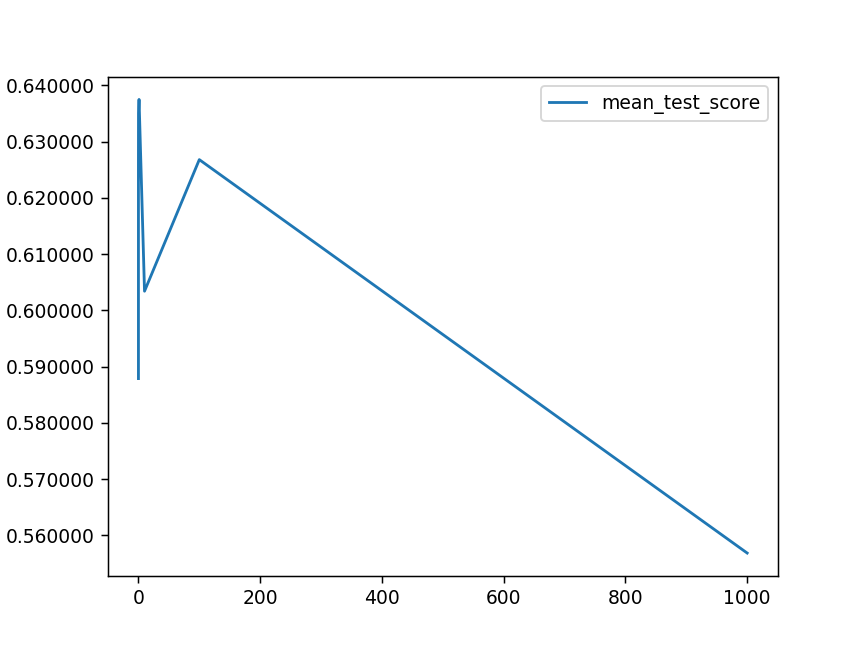

For C = [1.]:



array([[27386,  9692],
       [ 1495,  1397]], dtype=int64)

Score: 0.6676705454845778
Area under ROC: 0.6676705454845778




<IPython.core.display.Javascript object>


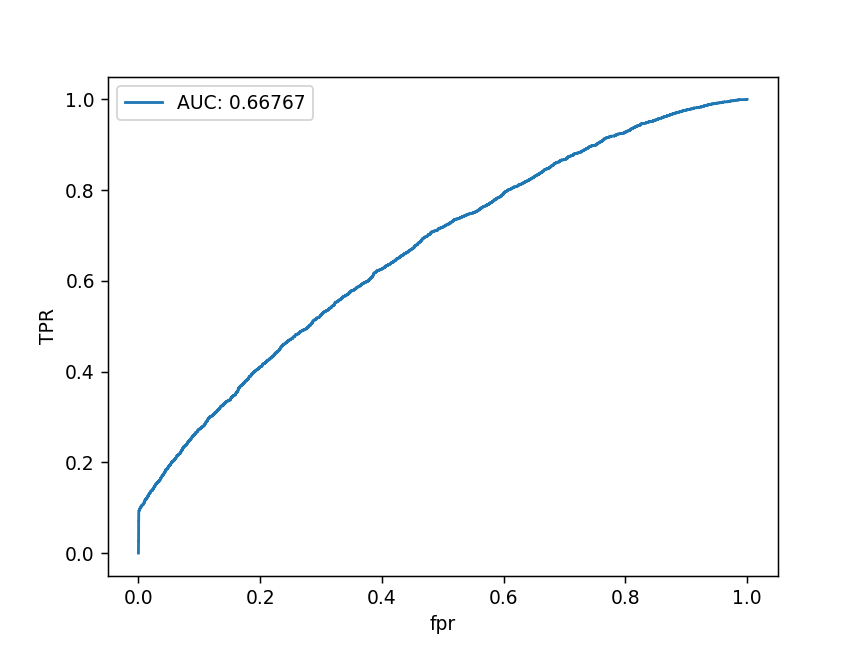

Text(0, 0.5, 'TPR')

Model estimates n = 20:


intercept                -2.831094
fine_amount              -6.355973
issued_hearing_days     -12.789774
loc_x                     1.032517
loc_y                    -3.171467
loc_z                    -3.325080
discount_YN               5.634160
POBOX                    -0.488305
agency_Env               -0.237188
agency_Health            -0.171857
agency_Police             0.366866
agency_Public             0.240652
violator_Bank             3.205559
violator_LLC              3.652931
violator_Other            3.718823
violation_Prop_Maint     -0.838526
violation_Solid_Waste    -0.750327
violation_Zoning         -0.598451
qt_1                      0.368638
qt_2                      0.177035
qt_3                     -0.038296
dtype: float64

In [295]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc

# 1. Use Grid Search to find parameter C value:

# Tried the following C ranges:
# np.logspace(-4, 3, 8) #Best C = 100
# np.arange(50,160,10) # Best C = 90
# np.linspace(85, 96, 1) # Best C = 90

C_list = np.logspace(-4, 3, 8)
# C_list = np.arange(90, 91,1)
cv_lr = LogisticRegressionCV(
        Cs=C_list
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=3
        ,random_state=0
        ,max_iter=3000
        ,fit_intercept=True
        ,solver='saga'
        ,class_weight='balanced'
    )

cv_lr.fit(X_train_scaled, y_train)

#Plot mean test scores for C parameter
k = pd.DataFrame(cv_lr.scores_[1].mean(axis=0), columns=['mean_test_score'], index=C_list)
k.sort_values(by='mean_test_score', ascending=False)

%matplotlib notebook
import matplotlib.ticker
k.plot.line()
formatter = matplotlib.ticker.StrMethodFormatter("{x:.6f}")
plt.gca().yaxis.set_major_formatter(formatter);


# 2. Now predict using grid search logistic regressor

##Get confusion matrix and accuracy score
y_pred = cv_lr.predict(X_test_scaled)
score = cv_lr.score(X_test_scaled, y_test) #based on scoring method

#     y_proba_list = list(zip(y_test[0:20], prob[0:20,1]))
 
# k = prob[:20]
# list(zip(k, list(map(lambda i: i.sum(),  k))))


print('For C = {}:\n'.format(cv_lr.C_))
confusion_matrix(y_test, y_pred)
print('Score: {}'.format(score)) 

# 3. Plot Precision Recall Curve, ROC and Area under Curve
prob_grid = cv_lr.predict_proba(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, prob_grid[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_grid[:,1])

df1 = pd.DataFrame((precision, recall), index=['precision', 'recall']).T
df2 = pd.DataFrame((fpr_lr, tpr_lr), index=['fpr', 'tpr']).T
# df2.head()

auroc = auc(fpr_lr, tpr_lr)
print('Area under ROC: {}\n\n'.format(auroc))

# ax1 = df1.plot.line(x='precision', y='recall', label='Prediction Score: {:.5f}'.format(score))
# ax1.set_ylabel('Recall')

ax2 = df2.plot.line(x='fpr', y='tpr', label='AUC: {:.5f}'.format(auroc))
ax2.set_ylabel('TPR')

#Model estimates      
print('Model estimates n = {}:'.format(len(cv_lr.coef_[0])))
pd.Series(np.append(cv_lr.intercept_[0], cv_lr.coef_[0]), index=['intercept']+cols)

### Logistic Regression with Grid Search CV + Pipeline

In [161]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc
from sklearn.pipeline import Pipeline


#Include just columns needed
cols = [
          'fine_amount'
         , 'late_fee'
         , 'discount_amount'
         , 'judgment_amount'
         , 'issued_hearing_days'
         , 'loc_x', 'loc_y', 'loc_z'
         , 'POBOX_0', 'POBOX_1'
         , 'discount_N', 'discount_Y'
#         , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#          , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
         , 'violatorAcorn_N', 'violatorAcorn_Y'
#         , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#          , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'
#          , 'qt_1', 'qt_2', 'qt_3','qt_4'
#          , 'hr10am_Y', 'hr10am_N'

    ]


X = train.loc[:, cols]
y = train.iloc[:, -1]

X_test = test.loc[:, cols]

# For continous variables
# Fill in nan with median values
# bc only issued_hearing_days and loc_xyz have missing values and their distributions are skewed
imp = SimpleImputer(strategy = 'median')


# Scale continuous variables
scaler = MinMaxScaler()
#scaler = StandardScaler()

# 1. Use Grid Search to find parameter C value:

# Tried the following C ranges:
# np.logspace(-4, 3, 8) #Best C = 10,


logistic = LogisticRegression(random_state=0, max_iter=1000, solver='saga', penalty='l1', class_weight='balanced')
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe = Pipeline(steps=[('impute', imp), ('scale', scaler), ('logistic', logistic)], verbose=1)
# pipe.get_params().keys()

# Parameters of pipelines can be set using ‘__’ separated parameter names:
grid_values = {'logistic__C': [5, 10, 15]}
grid_lr = GridSearchCV(estimator = pipe, param_grid = grid_values, scoring = 'roc_auc', cv = 3, return_train_score=True,
                       n_jobs = 4, pre_dispatch = '2*n_jobs')
grid_lr.fit(X, y)



[Pipeline] ............ (step 1 of 3) Processing impute, total=   0.6s
[Pipeline] ............. (step 2 of 3) Processing scale, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing logistic, total= 2.9min


C:\Users\tuttoaposto\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('impute',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('scale',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                    

In [162]:
#Model Evaluation
#print("Best Estimator: \n{}\n".format(grid_lr.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_lr.best_params_))
print("Best Test Score: \n{}\n".format(grid_lr.best_score_))
print("Best Training Score: \n{}\n".format(grid_lr.cv_results_['mean_train_score'][grid_lr.best_index_]))

intercept = grid_lr.best_estimator_.named_steps['logistic'].intercept_[0]
coef = grid_lr.best_estimator_.named_steps['logistic'].coef_[0]
print('Model estimates n = {}:'.format(len(coef)))
pd.Series(np.append(intercept, coef), index=['intercept']+cols)

Best Parameters: 
{'logistic__C': 1000.0}

Best Test Score: 
0.7574488387879025

Best Training Score: 
0.7590073686270754

Model estimates n = 17:


intercept                  2.099709
fine_amount              879.593034
judgment_amount         -890.065184
loc_x                      1.165417
loc_y                     -5.462243
loc_z                     -1.074703
POBOX_0                    1.142813
POBOX_1                    0.537058
discount_N                -1.391052
discount_Y                 3.070922
agency_Env                 0.110841
agency_Other               0.017870
agency_Police              0.838787
agency_Public              0.712373
violation_Graffiti         0.896727
violation_Prop_Maint       0.171321
violation_Solid_Waste      0.202966
violation_Zoning           0.408856
dtype: float64

In [8]:
#Model Evaluation
#print("Best Estimator: \n{}\n".format(grid_lr.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_lr.best_params_))
print("Best Test Score: \n{}\n".format(grid_lr.best_score_))
print("Best Training Score: \n{}\n".format(grid_lr.cv_results_['mean_train_score'][grid_lr.best_index_]))

intercept = grid_lr.best_estimator_.named_steps['logistic'].intercept_[0]
coef = grid_lr.best_estimator_.named_steps['logistic'].coef_[0]
print('Model estimates n = {}:'.format(len(coef)))
pd.Series(np.append(intercept, coef), index=['intercept']+cols)

Best Parameters: 
{'logistic__C': 10.0}

Best Test Score: 
0.7475967187887296

Best Training Score: 
0.7674822179480794

Model estimates n = 12:


intercept                0.269352
fine_amount            897.015412
judgment_amount       -907.411970
issued_hearing_days    -17.686094
loc_x                    0.157647
loc_y                   -0.002390
loc_z                   -3.979411
POBOX_0                  0.483356
POBOX_1                 -0.117986
discount_N              -2.204105
discount_Y               2.473458
violatorAcorn_N          4.168415
violatorAcorn_Y         -3.899047
dtype: float64

### SVM with Grid Search and Pipeline -- Total Disaster!

In [145]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc
from sklearn.pipeline import Pipeline

#Include just columns needed
cols = [
         'fine_amount'
         , 'judgment_amount'
         , 'issued_hearing_days'
         , 'loc_x', 'loc_y', 'loc_z'
         , 'POBOX_0', 'POBOX_1'
         , 'discount_N', 'discount_Y'
#          , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#          , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
         , 'violatorAcorn_N', 'violatorAcorn_Y'
         , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#          , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'
#          , 'qt_1', 'qt_2', 'qt_3','qt_4'
#          , 'hr10am_Y', 'hr10am_N'

    ]



X = train.loc[:, cols]
y = train.iloc[:, -1]

X_test = test.loc[:, cols]

# For continous variables
# Fill in nan with median values
# bc only issued_hearing_days and loc_xyz have missing values and their distributions are skewed
imp = SimpleImputer(strategy = 'median')


# Scale continuous variables
scaler = MinMaxScaler()
#scaler = StandardScaler()

# 1. Use Grid Search to find parameter C value:

# Tried the following C ranges:
# np.logspace(-4, 2, 8) #Getting bath tub shape with bottom at C = 10, then plateau at C=1000
# np.linspace(10,1000,100, dtype=int) # Highest test score at C = 90, then plateau after
# np.linspace(85, 109, 25) # Final round: C = 94 is the max score


svc = SVC(kernel='rbf', random_state=0, max_iter=500, class_weight='balanced')

# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe = Pipeline(steps=[('impute', imp), ('scale', scaler), ('svc', svc)], verbose=1)
# pipe.get_params().keys()

# Parameters of pipelines can be set using ‘__’ separated parameter names:
grid_values = [{'svc__C': np.logspace(-4, 3, 8),
                'svc__kernel' : ['linear']
               },
               {'svc__C': np.logspace(-4, 3, 8),
                'svc__kernel' : ['rbf'],
                'svc__gamma': ['auto']+list(np.logspace(-4, 3, 8))
               }]


grid_sv = GridSearchCV(estimator = pipe, param_grid = grid_values, scoring = 'roc_auc', cv = 3, return_train_score=True
                       ,n_jobs = 4, pre_dispatch = '2*n_jobs')
grid_sv.fit(X, y)



C:\Users\tuttoaposto\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Pipeline] ............ (step 1 of 3) Processing impute, total=   0.3s
[Pipeline] ............. (step 2 of 3) Processing scale, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   2.3s


C:\Users\tuttoaposto\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('impute',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('scale',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0

In [146]:
#Model Evaluation
print("Best Estimator: \n{}\n".format(grid_sv.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_sv.best_params_))
print("Best Test Score: \n{}\n".format(grid_sv.best_score_))
print("Best Training Score: \n{}\n".format(grid_sv.cv_results_['mean_train_score'][grid_sv.best_index_]))
# print("All Training Scores: \n{}\n".format(grid_sv.cv_results_['mean_train_score']))
# print("All Test Scores: \n{}\n".format(grid_sv.cv_results_['mean_test_score']))

Best Estimator: 
Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=1000.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=500, probability=False,
                     random_state=0, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=1)

Best Parameters: 
{'svc__C': 1000.0, 'svc__kernel': 'linear'}

Best Test Score: 
0.5697736381336337

Best Training Score: 
0.585805078642053



### Random Forest with Grid Search Tuning CV and Pipiline

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc
from sklearn.pipeline import Pipeline

#Include just columns needed
cols = ['ticket_id'
        , 'judgment_amount'
         , 'fine_amount' 
         , 'issued_hearing_days'
         , 'loc_x', 'loc_y', 'loc_z'
         , 'POBOX_0', 'POBOX_1'
         , 'discount_N', 'discount_Y'
#          , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#          , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
#          , 'violatorAcorn_N', 'violatorAcorn_Y'
#          , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#          , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'
#          , 'qt_1', 'qt_2', 'qt_3','qt_4'
#          , 'hr10am_Y', 'hr10am_N'

    ]

X = train.loc[:, cols]
y = train.iloc[:, -1]

X_test = test.loc[:, cols]

# For continous variables
# Fill in nan with median values
# bc only issued_hearing_days and loc_xyz have missing values and their distributions are skewed
imp = SimpleImputer(strategy = 'median')


# Scale continuous variables
scaler = MinMaxScaler()
#scaler = StandardScaler()

# 1. Use Grid Search to find parameter C value:

# Tried the following C ranges:
# np.logspace(-4, 2, 8) #Getting bath tub shape with bottom at C = 10, then plateau at C=1000
# np.linspace(10,1000,100, dtype=int) # Highest test score at C = 90, then plateau after
# np.linspace(85, 109, 25) # Final round: C = 94 is the max score

rf = RandomForestClassifier(random_state=0, class_weight='balanced')

pipe = Pipeline(steps=[('impute', imp), ('rf', rf)], verbose=1)
# pipe.get_params().keys()


# Parameters of pipelines can be set using ‘__’ separated parameter names:
grid_values = {
                 'rf__n_estimators': [100, 200, 300],
                 'rf__max_features': [2, 3, 4, 5, 6],
                 'rf__max_depth' : [2, 3, 4, 5]
             }


grid_rf = GridSearchCV(estimator = pipe, param_grid = grid_values, scoring = 'roc_auc', cv = 3, return_train_score=True
                       ,n_jobs = 4, pre_dispatch = '2*n_jobs')
grid_rf.fit(X, y)

#Model Evaluation
print("Best Estimator: \n{}\n".format(grid_rf.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_rf.best_params_))
print("Best Test Score: \n{}\n".format(grid_rf.best_score_))
print("Best Training Score: \n{}\n".format(grid_rf.cv_results_['mean_train_score'][grid_rf.best_index_]))
# print("All Training Scores: \n{}\n".format(grid_sv.cv_results_['mean_train_score']))
# print("All Test Scores: \n{}\n".format(grid_sv.cv_results_['mean_test_score']))

FI = grid_rf.best_estimator_.named_steps['rf'].feature_importances_
pd.Series(FI, name='Feature_Importance', index=cols).sort_values(ascending=False)

[Pipeline] ............ (step 1 of 2) Processing impute, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  28.4s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('impute',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight='balanced',
                                                               criterion='gini',
                                                               max_depth

Best Estimator: 
Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=4,
                                        max_features=3, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                     

judgment_amount        0.505683
discount_N             0.142858
discount_Y             0.120965
fine_amount            0.110495
ticket_id              0.045635
loc_z                  0.020961
issued_hearing_days    0.020047
POBOX_0                0.014516
POBOX_1                0.011122
loc_y                  0.005347
loc_x                  0.002370
Name: Feature_Importance, dtype: float64

### Random Forest with Separate Manual Tuning and Cross Validation and Pipeline

In [71]:
from sklearn.model_selection import cross_val_score, cross_validate

cols = ['ticket_id'
        , 'judgment_amount'
         , 'fine_amount' 
         , 'issued_hearing_days'
         , 'loc_x', 'loc_y', 'loc_z'
         , 'POBOX_0', 'POBOX_1'
         , 'discount_N', 'discount_Y'
#          , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#          , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
#          , 'violatorAcorn_N', 'violatorAcorn_Y'
#          , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#          , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'
#          , 'qt_1', 'qt_2', 'qt_3','qt_4'
#          , 'hr10am_Y', 'hr10am_N'

    ]


X = train[cols]
y = train.iloc[:, -1]

imp = SimpleImputer(strategy = 'median')


# Scale continuous variables
scaler = MinMaxScaler()
#scaler = StandardScaler()

rf = RandomForestClassifier(random_state=0, class_weight='balanced', n_estimators=200, max_depth=4)
pipe = Pipeline(steps=[('impute', imp), ('rf', rf)], verbose=0)

# scores = cross_val_score(pipe, X, y, scoring='roc_auc')
cv = cross_validate(pipe, X, y, scoring='roc_auc', return_train_score=True, return_estimator=True)

# Model Evaluation
print('Mean CV test score: {}'.format(cv['test_score'].mean()))
print('Mean CV train score: {}'.format(cv['train_score'].mean()))
      
FI = []
for i in range(5):
    fi = cv['estimator'][i].named_steps['rf'].feature_importances_
    FI.append(fi)

k = pd.DataFrame(FI, columns=cols)

print('Feature Importance:\n', k.mean(axis=0).sort_values(ascending=False))

### Gradient Boosting Decision Trees with Grid Search CV and Pipeline

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#FUll model the worst!
cols = [
        'discount_amount'
        , 'late_fee'
        , 'diff'
        , 'responsible'
#         , 'ticket_id'
        , 'judgment_amount'
        , 'fine_amount'
        , 'issued_hearing_days'
#         , 'lat', 'lon'
         , 'loc_x', 'loc_y', 'loc_z'

#          , 'mailing_address_str_number'
#          , 'violator_grp_id'
         , 'violation_c'
#         , 'POBOX_0', 'POBOX_1'


#         , 'violation_Graffiti', 'violation_Prop_Maint', 'violation_Solid_Waste', 'violation_Zoning'
#         , 'mo'
#         , 'mo_hearing', 'dow_hearing'
#         , 'agency_Env', 'agency_Other', 'agency_Police', 'agency_Public'
#         , 'violator_Acorn', 'violator_Bank', 'violator_LLC', 'violator_Other'
#         , 'city_DEARBORN', 'city_DETROIT', 'city_FARMINGTON_HILLS', 'city_Other', 'city_SOUTHFIELD', 'city_WEST_BLOOMFIELD'

#       , 'discount_N', 'discount_Y'
#          , 'violatorAcorn_N', 'violatorAcorn_Y'
#          , 'qt_1', 'qt_2', 'qt_3','qt_4'
#          , 'hr10am_Y', 'hr10am_N'
#          , 'qt_num'    
#          , 'hr', 'hr_hearing'
    ]

X = train.loc[:, cols]
y = train.iloc[:, -1]

X_test = test.loc[:, cols]

imp = SimpleImputer(strategy = 'median')

# rate = [i*j for i in np.logspace(-5,-1,5) for j in [1, 5]] #Best = 0.1
# rate = np.linspace(0.1, 0.5, 5) # Best = 0.1
rate = [0.05, 0.075, 0.1, 0.125, 0.15, 0.2] # Best = 0.05

# n = [100, 200, 300, 400, 500], # Best at n = 200
# n = np.linspace(200, 400, 5, dtype=int) # Best = 250
# n = np.linspace(100, 400, 7, dtype=int) #Best = 100
# n = [30, 50, 80, 100] # Best = 80
# n = [65, 75] # Best = 70 for lat/lon
# n = [90, 120, 150] # Best = 150 for loc_xyz
n = [60, 80, 100, 120, 150] # Best = 150 for loc_xyz
gb = GradientBoostingClassifier(random_state = 0, n_estimators =100, learning_rate = 0.05, max_depth = 5, max_features = 1)

# Parameters of pipelines can be set using ‘__’ separat ved parameter names:
grid_values = {
                  'gb__n_estimators': n
#                   , 'gb__max_features': [1, 2]
#                   , 'gb__max_depth' : [2, 3, 4]
#                   ,   'gb__learning_rate' : [0.075, 0.1, 0.125]
             }

pipe = Pipeline(steps=[('impute', imp), ('gb', gb)], verbose=0)
# pipe.get_params().keys()

grid_gb = GridSearchCV(estimator = pipe, param_grid = grid_values, scoring = 'roc_auc', cv = 5, return_train_score=True
                       ,n_jobs = 4, pre_dispatch = '2*n_jobs')
grid_gb.fit(X, y)


#Model Evaluation
print("Best Estimator: \n{}\n".format(grid_gb.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_gb.best_params_))
print("Best Test Score: \n{}\n".format(grid_gb.best_score_))
print("Best Training Score: \n{}\n".format(grid_gb.cv_results_['mean_train_score'][grid_gb.best_index_]))
print("All Test Scores: \n{}\n".format(grid_gb.cv_results_['mean_test_score']))
print("All Training Scores: \n{}\n".format(grid_gb.cv_results_['mean_train_score']))

FI = grid_gb.best_estimator_.named_steps['gb'].feature_importances_
pd.Series(FI, name='Feature_Importance', index=cols).sort_values(ascending=False)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('impute',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('gb',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.05,
                                                          

Best Estimator: 
Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('gb',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.05, loss='deviance',
                                            max_depth=5, max_features=1,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
               

responsible            0.204760
late_fee               0.204320
discount_amount        0.198831
diff                   0.189481
judgment_amount        0.056314
issued_hearing_days    0.055473
fine_amount            0.044607
loc_z                  0.016143
loc_x                  0.012073
loc_y                  0.010744
violation_c            0.007255
Name: Feature_Importance, dtype: float64

In [5]:
#Print best results per each n_estimator value

k = pd.DataFrame(grid_gb.cv_results_)
k = k[['param_gb__n_estimators', #'param_gb__learning_rate', 'param_gb__max_depth', 'param_gb__max_features',
        'mean_test_score', 'mean_train_score', 'rank_test_score']].copy()
k[k['rank_test_score']==1]

#Convert cv_results to list to be used in graphing
k.sort_values('rank_test_score').groupby(['param_gb__n_estimators' ]).head(1)
k_best = k.sort_values('rank_test_score').groupby(['param_gb__n_estimators' ]).head(1)
for i in range(len(k_best)):
    print(list(k_best.iloc[i].values))

,param_gb__n_estimators,mean_test_score,mean_train_score,rank_test_score
2,100,0.770221,0.793055,1


,param_gb__n_estimators,mean_test_score,mean_train_score,rank_test_score
2,100,0.770221,0.793055,1
3,120,0.769953,0.794938,2
1,80,0.769930,0.791286,3
4,150,0.769600,0.797798,4
0,60,0.768863,0.788985,5


[100, 0.7702209408742361, 0.7930546947793374, 1]
[120, 0.7699532595253983, 0.7949383754391326, 2]
[80, 0.7699297342983309, 0.7912859106197885, 3]
[150, 0.7695996990296643, 0.7977983818820561, 4]
[60, 0.7688626043716651, 0.7889848712451009, 5]


In [172]:
#Print best results per each n_estimator value

k = pd.DataFrame(grid_gb.cv_results_)
k = k[['param_gb__n_estimators', #'param_gb__learning_rate', 'param_gb__max_depth', 'param_gb__max_features',
        'mean_test_score', 'mean_train_score', 'rank_test_score']].copy()
k[k['rank_test_score']==1]

#Convert cv_results to list to be used in graphing
k.sort_values('rank_test_score').groupby(['param_gb__n_estimators' ]).head(1)
k_best = k.sort_values('rank_test_score').groupby(['param_gb__n_estimators' ]).head(1)
for i in range(len(k_best)):
    print(list(k_best.iloc[i].values))

,param_gb__n_estimators,mean_test_score,mean_train_score,rank_test_score
2,100,0.77012,0.792228,1


,param_gb__n_estimators,mean_test_score,mean_train_score,rank_test_score
2,100,0.770120,0.792228,1
1,80,0.770119,0.790310,2
0,60,0.769776,0.787537,3
3,120,0.769328,0.794436,4
4,150,0.769073,0.796981,5


[100, 0.7701197594432284, 0.7922275203080623, 1]
[80, 0.7701189729572737, 0.7903099849560983, 2]
[60, 0.7697757190370446, 0.7875373729736573, 3]
[120, 0.7693281657954911, 0.7944361748802377, 4]
[150, 0.7690733902627936, 0.7969808407520462, 5]


### Graph AUC Test and Train Scores

<IPython.core.display.Javascript object>


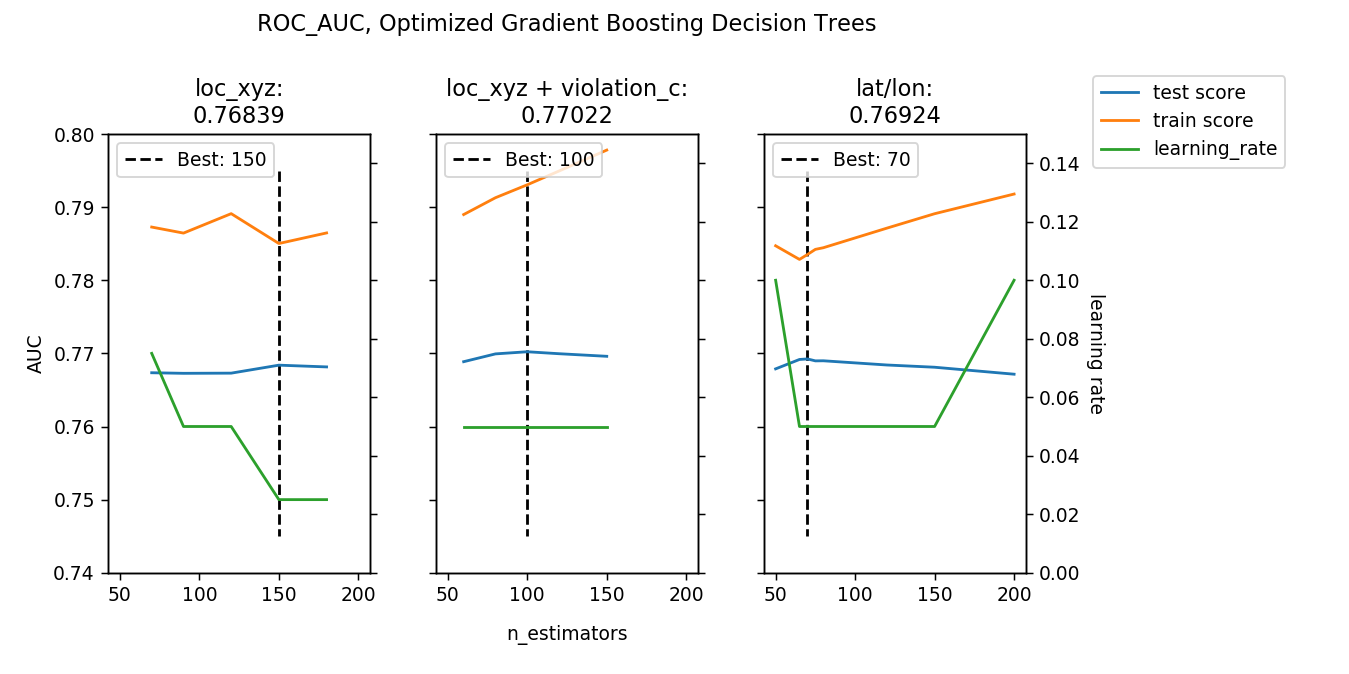

In [10]:
######## Save grid search results for each feature set

#with loc_x,y,z:
from matplotlib import pyplot as plt
xyz = pd.DataFrame([[70, 0.075, 4, 2, 0.7673505740277486 , 0.7872737113693136],
                        [90, 0.05, 4, 2, 0.7672725433122638, 0.786448450010781],
                        [120, 0.05, 4, 2, 0.7672960456914517, 0.7891070946520437],
                        [150, 0.025, 4, 2, 0.7683871187556714, 0.785023845124884],  #<-- the best
                        [180, 0.025, 4, 2, 0.7681494575519124, 0.7864706591337074]]
                       , columns=['n_estimators', 'learning_rate', 'max_depth', 'max_features',
                       'best_test_score', 'best_train_score'])
xyz['train_test_score_diff'] = xyz['best_train_score'] - xyz['best_test_score']
best_xyz_test = xyz['best_test_score'].max()
best_xyz_n = xyz.loc[xyz['best_test_score']==best_xyz_test, 'n_estimators'].values[0]


#with lat/lon:
from matplotlib import pyplot as plt
df = pd.DataFrame([[50, 0.1, 4, 1, 0.767880948, 0.784711938, 0.016830990],
                [65, 0.05, 4, 1, 0.769166536, 0.782849464, 0.013682928],
                [70, 0.05, 4, 1, 0.769239014, 0.783518744, 0.014279730],  #<-- the best
                [75, 0.05, 4, 1, 0.768974650, 0.784223020, 0.015248370],
                [80, 0.05, 4, 1, 0.768987163, 0.784447128, 0.015459964],
                [120, 0.05, 4, 1, 0.768410935, 0.787126905, 0.018715971],
                [150, 0.05, 4, 1, 0.768104958, 0.789097137, 0.020992178],
                [200, 0.1, 4, 1, 0.767152194, 0.791789639, 0.024637445]]
            , columns=['n_estimators', 'learning_rate', 'max_depth', 'max_features',
                       'best_test_score', 'best_train_score', 'train_test_score_diff' ])
best_latlon_test = df['best_test_score'].max()
best_latlon_n = df.loc[df['best_test_score']==best_latlon_test, 'n_estimators'].values[0]

#with loc_xyz + violation_c
xyz_c = pd.DataFrame([[100, 0.05, 5, 1, 0.7702209408742361, 0.7930546947793374],
                    [120, 0.05, 5, 1, 0.7699532595253983, 0.7949383754391326],
                    [80, 0.05, 5, 1, 0.7699297342983309, 0.7912859106197885],
                    [150, 0.05, 5, 1, 0.7695996990296643, 0.7977983818820561],
                    [60, 0.05, 5, 1, 0.7688626043716651, 0.7889848712451009]]
                     , columns=['n_estimators', 'learning_rate', 'max_depth', 'max_features',
                       'best_test_score', 'best_train_score' ])
xyz_c['train_test_score_diff'] = xyz_c['best_train_score'] - xyz_c['best_test_score']
best_xyz_c_test = xyz_c['best_test_score'].max()
best_xyz_c_n = xyz_c.loc[xyz_c['best_test_score']==best_xyz_c_test, 'n_estimators'].values[0]
xyz_c



###### Plot scores vs n_estimators
%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharex=True, sharey=True)


for i, z in enumerate (list(zip([xyz, xyz_c, df],
                               [best_xyz_test, best_xyz_c_test, best_latlon_test],
                               [best_xyz_n, best_xyz_c_n, best_latlon_n],
                               ['loc_xyz', 'loc_xyz + violation_c', 'lat/lon']))):
    _df = z[0]
    best_score = z[1]
    best_n = z[2]
    t = z[3]
    
    _df.sort_values(by='n_estimators').plot('n_estimators', ['best_test_score', 'best_train_score', 'learning_rate'],
              ylim=(0.74, 0.8),
              secondary_y = ['learning_rate'],
              mark_right = False,
              title = '{}:\n{:.5f}'.format(t, best_score),
              ax=ax[i])

    if i == 0:
        ax[i].set_ylabel('AUC') #Only keep ylabel for the 1st/left subplot
    if i == 2:
        ax[i].right_ax.set_ylabel('learning rate', rotation = -90, labelpad = 8, verticalalignment = 'center')
    ax[i].right_ax.set_ylim(0, 0.15)
    ax[i].vlines(x = best_n, ymax = 0.745, ymin=0.795, linestyle='--', label='Best: {}'.format(best_n))
    
    #Turn off xlabels
    ax[i].set_xlabel(None)

    #Turn off right yaxis tick labels for 1st and 2nd subplots
    if i != 2:
        ax[i].right_ax.set_yticklabels([])

    handles, labels = ax[i].get_legend_handles_labels()
    # handles, labels 
    ax[i].legend(handles = (handles[2], ), labels = (labels[2], ), loc='upper left')




handles_r, labels_r = ax[-1].right_ax.get_legend_handles_labels()
# handles2[0:2] + handles_r
# labels2[0:2] + labels_r
fig.legend(handles = (handles[0:2] + handles_r ), labels=(['test score', 'train score']+ labels_r)
          , loc=(0.81, 0.75))


fig.subplots_adjust(top = 0.8, bottom = 0.15, left = 0.08, right = 0.76, hspace=0.3, wspace=0.25)

#Set positions of main title and x label
left = fig.subplotpars.left
right = fig.subplotpars.right
top = fig.subplotpars.top
bottom = fig.subplotpars.bottom

fig.suptitle(t='ROC_AUC, Optimized Gradient Boosting Decision Trees', x=(left+right)/2)
fig.text(x=(left+right)/2, y=0.05, s='n_estimators', ha='center');


# fig.text(0.05, 0.5, 'AUC', va='center', rotation = 90)
# ax.right_ax.legend(labels=['learning rate'], loc=2)


# ax1.get_legend().remove()
# ax2.get_legend().remove()

## Comments
- Prediction results: loc_xyz > loc_xyz+violation_c > lat/lon
- Derived location variables loc_x/y/z did worse in local test than the original lat/lon (.76839 vs .76924), but better in prediction on test set (.78574 vs .78280), suspect it might be use of fillna() outside of cross-validation??
- Adding violation_c raised local test score but didn't make prediction better than without it (.78530 vs .78574)
- Including all available columns make test score worse
- Including categorical variables lowers test score
- High correlation between numeric variables seems to be well-tolerated
- 0/1 binary variable 'responsible' doesn't need dummy-encoding, not sure what will happen if including more categorical features
- Gradient boosting decision trees tuning steps:
    1. Tune n_estimators with other defualt hyperparameters
    2. Get the best n_estimators (e.g. n = 70), grid-search max_depth
        - n_estimators often is inversely related with max_depth and learning_rate
        - n_estimators probably grows with feature space ->need more trees to capture more complex pattern
        - Larger feature space enables wider selection of features at splitting nodes --> max_features
    3. Try different combinations of n_estimators and max_depth around n = 70 (e.g. n = [50, 70, 100, 120])
    4. Tune learning_rate and max_features, separtely or together --> can take long at high n_estimators
    5. Collect the best paramter estimates for each set and plot a graph to see how test/train scores trend with n_estimators
    6. Avoid tuning all four hyperparameters together; it takes hours to finish all grid values combinations
    7. Rank feature importance in descending order, features after big drop in importance may indicate weak features and may help if removed
    8. Hyperparameters are sensitive to number of features, better to re-tune after swapping features
- Better averaging results =
          Deeper tree -> more complex tree -> higher max_depth (4) +  
          more variety of trees -> lower max_features (1)  
- Usually high depth leads to low n_estimators and vice versa, but lower max_features may need more trees to capture the entire variety. So aim for medium range of n_estimators grid values
    
- Consider using class_weight = 'balanced' for imbalance class size; this option is only available in LgisticRegression, SVC, and RandomForest, but not GradientBoosting

## Prediction using Optimized Gradient Boosting Trees

In [ ]:
X_test = test.loc[:, cols]
X_test.head()
prob = grid_gb.predict_proba(X_test)

#Put together probabilities into a dataframe
df = pd.DataFrame(prob, columns=['prob_0', 'prob_1'], index=test['ticket_id'])
# df['prob_1'].head(3); df['prob_1'].tail(3)
# prob[:3]
# prob[-3:]

#Check tickets that have the same probability
dup = df[df.duplicated(keep=False)].sort_values(by=['prob_1'])
dup = dup.merge(right=test, on='ticket_id', how='inner')

dup.iloc[:, :15]
dup.iloc[:, 15:30]
dup.iloc[:, 30:]